# Massaging and Visualizing Data

Our generic analytics program template

1. Acquire data, which means finding a suitable file or collecting data from the web and storing in a file
2. Load data from disk and place into memory organized into data structures
2. Normalize, clean, or otherwise prepare data
3. Process the data, which can mean training a machine learning model, computing summary statistics, or optimizing a cost function
4. Emit results, which can be anything from simply printing an answer to saving data to the disk to generating a fancy visualization

numpy array is homogeneous 1, 2, or multidimensional array. they must all have the same type

To make loading data meaningful, we'll also learn how to generate histograms from data files using [matplotlib](https://matplotlib.org/).

tuples
set
list of tuples
dict

slicing/splicing

X to x, y

missing values
	delete row
	insert value

scatter

sine wave

histogram; unif, normal

## Plotting functions

66150 samples in 1.5 seconds


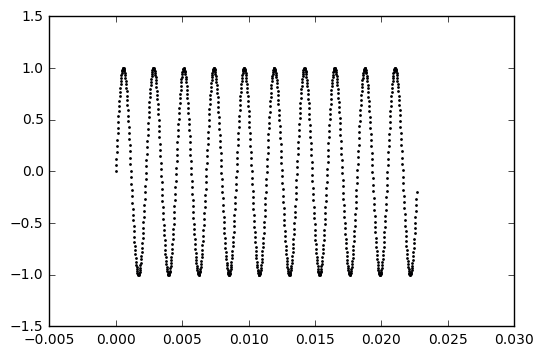

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fs = 44100 # sampling frequency
T = 1.5    # seconds
t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable
y = np.sin(2*np.pi*440*t)                     # pure sine wave at 440 Hz
print len(y), "samples in", T, "seconds"
plt.scatter(t[0:1000],y[0:1000],s=1)
plt.show()

then add them together

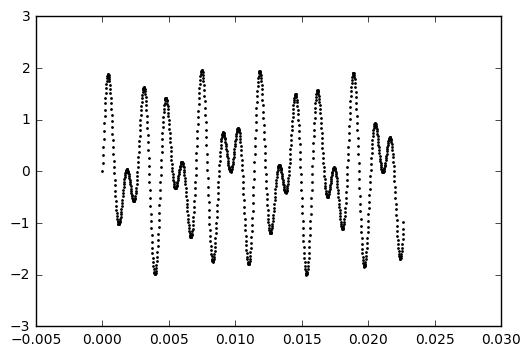

In [5]:
y2 = np.sin(2*np.pi*700*t)                     # pure sine wave at 700 Hz
plt.scatter(t[0:1000],y[0:1000]+y2[0:1000],s=1)
plt.show()

## Loading tables

dataframes

In [19]:
import pandas
sales = pandas.read_csv('data/sales-small.csv')
pandas.options.display.max_rows = 4
sales

,Date,Quantity,Unit Price,Shipping,Customer Name,Product Category,Product Name
0,10/13/10,6,38.94,35.00,Muhammed MacIntyre,Office Supplies,"Eldon Base for stackable storage shelf, platinum"
1,10/1/12,49,208.16,68.02,Barry French,Office Supplies,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera..."
...,...,...,...,...,...,...,...
29,10/21/12,49,6.08,1.17,Grant Carroll,Office Supplies,Col-Erase� Pencils with Erasers
30,1/1/11,10,5.98,4.38,Don Miller,Technology,"Imation 3.5"" DS/HD IBM Formatted Diskettes, 10..."


In [14]:
sales['Date']

0     10/13/10
1      10/1/12
        ...   
29    10/21/12
30      1/1/11
Name: Date, dtype: object

In [15]:
sales['Customer Name']

0     Muhammed MacIntyre
1           Barry French
             ...        
29         Grant Carroll
30            Don Miller
Name: Customer Name, dtype: object

can convert to matrix:

In [23]:
m = sales.as_matrix()
m[0] # get first row

array(['10/13/10', 6, 38.94, 35.0, 'Muhammed MacIntyre', 'Office Supplies',
       'Eldon Base for stackable storage shelf, platinum'], dtype=object)

In [21]:
m[:,0] # get first column

array(['10/13/10', '10/1/12', '10/1/12', '7/10/11', '8/28/10', '8/28/10',
       '6/17/11', '6/17/11', '3/24/11', '2/26/10', '11/23/10', '11/23/10',
       '6/8/12', '6/8/12', '8/4/12', '5/30/11', '11/25/09', '2/14/12',
       '2/14/12', '4/15/12', '4/15/12', '3/12/10', '3/12/10', '3/9/11',
       '3/9/11', '8/4/12', '5/6/11', '12/23/10', '11/8/10', '10/21/12',
       '1/1/11'], dtype=object)

In [22]:
m[:,4] # get fifth column

array(['Muhammed MacIntyre', 'Barry French', 'Barry French',
       'Clay Rozendal', 'Carlos Soltero', 'Carlos Soltero', 'Carl Jackson',
       'Carl Jackson', 'Monica Federle', 'Dorothy Badders',
       'Neola Schneider', 'Neola Schneider', 'Carlos Daly', 'Carlos Daly',
       'Claudia Miner', 'Neola Schneider', 'Allen Rosenblatt',
       'Sylvia Foulston', 'Sylvia Foulston', 'Jim Radford', 'Jim Radford',
       'Carlos Soltero', 'Carlos Soltero', 'Carl Ludwig', 'Carl Ludwig',
       'Don Miller', 'Annie Cyprus', 'Carl Ludwig', 'Carlos Soltero',
       'Grant Carroll', 'Don Miller'], dtype=object)

In [ ]:
import pandas
sales = pandas.read_csv('/tmp/sales-small.csv')
pandas.options.display.max_rows = 10
sales

note doesn't work: can't handle quotes you get errors

sales = np.genfromtxt('/tmp/cars.csv', delimiter=',', names=True)

## Scatter plots

save as csv from cars.xls

```python
import numpy as np
import matplotlib.pyplot as plt
cars = pandas.read_csv('/tmp/cars.csv')
cars = cars.as_matrix()
plt.scatter(cars[:,0], cars[:,3], alpha=0.5) # looks cooler with alpha (opacity) at 50%
plt.show()
```

```
[[   18.     8.   307.  3504.]
 [   15.     8.   350.  3693.]
 [   18.     8.   318.  3436.]
 ..., 
 [   32.     4.   135.  2295.]
 [   28.     4.   120.  2625.]
 [   31.     4.   119.  2720.]]
```

## Word clouds

clean out punct, ws, nums, short words. filter out stop words

show unique words with set(words).

Python has a nice library called `wordcloud` we can use. It should already be installed in your Anaconda  Python directory, but if not use the command line:

```bash
$ pip install wordcloud
```

```python
from wordcloud import WordCloud
from csvcols import get_column
import matplotlib.pyplot as plt
import sys

...
wordcloud = WordCloud(width=1800,
                      height=1400,
                      max_words=10000,
                      random_state=1,
                      relative_scaling=0.25)

... get tuples with (word,count) from categories Counter ...                      
wordcloud.fit_words(wordtuples)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
```